In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gudhi as gd
from Aux_functions import prepare_data, sum_of_longest_distances

## We are going to use the parameter "sum of the deaths of H0" to understand how convenient it is for FC Barcelona to buy a new player from the Spanish league.


### First, we prepare FC Barcelona's data.

In [2]:
data = pd.read_csv("Final.csv")
data = data[data['Min'] > 1350]

barcelona_players = data[data['Squad'] == 'Barcelona']

la_liga_players = data[(data['Comp'] == 'es La Liga') & (data['Pos'] != 'GK') & (data['Squad'] != 'Barcelona')]

### We compute FC Barcelona's persistence barcode for its current team.

In [3]:
def compute_and_plot_persistence(players_data: pd.DataFrame, team_name: str) -> None:
    rc = gd.RipsComplex(points=players_data, max_edge_length=100)
    tr = rc.create_simplex_tree(max_dimension=2)
    diag = tr.persistence()
    
    gd.plot_persistence_barcode(diag)

    plt.title(f'Persistence barcode for {team_name}')
    
    plt.show()

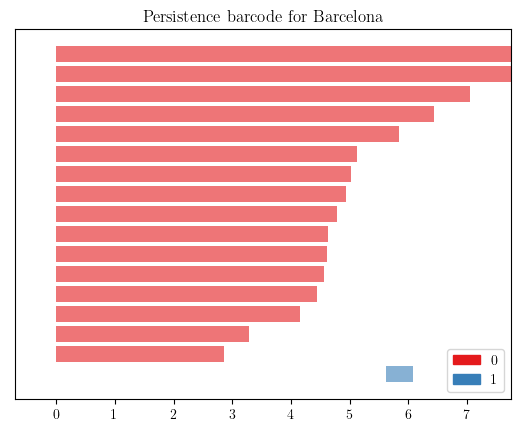

In [4]:
base_barcelona_data = prepare_data(barcelona_players)

compute_and_plot_persistence(base_barcelona_data, 'Barcelona')

### Now, we will compute FC Barcelona's persistence barcode with the addition of a new player. We perform this operation with 5 different players. This is mostly for visualization purposes.

In [5]:
def add_player(base_data: pd.DataFrame, player_data: pd.DataFrame) -> pd.DataFrame:
    return base_data + player_data

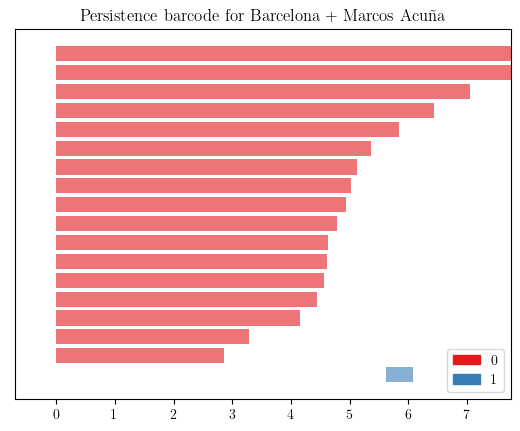

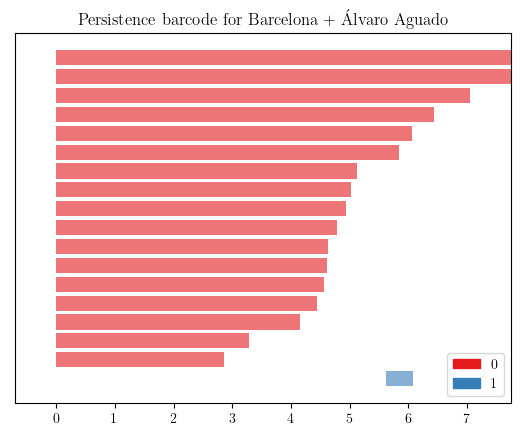

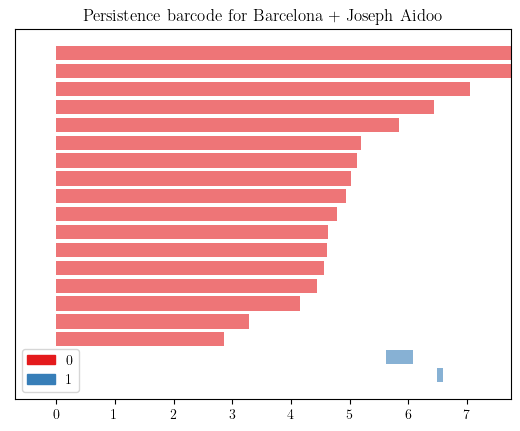

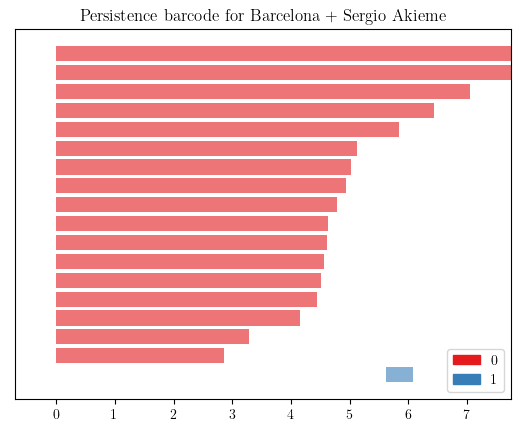

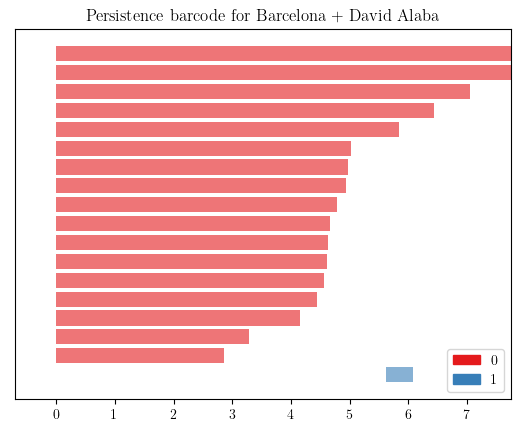

In [6]:
counter = 0

for index, player in la_liga_players.iterrows():
    counter += 1

    current_player_data = prepare_data(pd.DataFrame([player]))
    updated_data = add_player(base_barcelona_data, current_player_data)

    compute_and_plot_persistence(updated_data, f'Barcelona + {player["Player"]}')
    
    if counter == 5:
        break


### We now compute the sum of the deaths of H0 for FC Barcelona plus one added player. According to our sparsity hypothesis, the highest the result, the better the addition.

In [7]:
results = []
initial_sum = sum_of_longest_distances(base_barcelona_data, 'Barcelona')

for index, player in la_liga_players.iterrows():
    current_player_data = prepare_data(pd.DataFrame([player]))
    updated_data = add_player(base_barcelona_data, current_player_data)
    
    result = sum_of_longest_distances(updated_data, f'Barcelona + {player["Player"]}')
    results.append(result)

sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

counter = 0

for team_name, sum_longest_distances in sorted_results:
    counter += 1

    print(f"Sum of deaths till {team_name} is: {sum_longest_distances}")

    if counter == 10:
        break

Sum of deaths till Barcelona + Karim Benzema is: 79.50198663057895
Sum of deaths till Barcelona + Gerard Gumbau is: 77.7786031378094
Sum of deaths till Barcelona + Iker Muniain is: 76.60732175850684
Sum of deaths till Barcelona + Adri Embarba is: 76.27232727180927
Sum of deaths till Barcelona + Enes Ünal is: 75.97654932036009
Sum of deaths till Barcelona + Aleix García is: 75.9472621333812
Sum of deaths till Barcelona + Toni Kroos is: 75.91500761719121
Sum of deaths till Barcelona + Borja Iglesias is: 75.81542289101122
Sum of deaths till Barcelona + Daniel Parejo is: 75.42046413581407
Sum of deaths till Barcelona + Joselu is: 75.38509210686244


### We create a histogram to enhance visualization of the obtained situation.

In [8]:
sums_of_longest_distances = [result[1] for result in results]

max_distance = max(sums_of_longest_distances)

normalized_distances = [x / max_distance for x in sums_of_longest_distances]

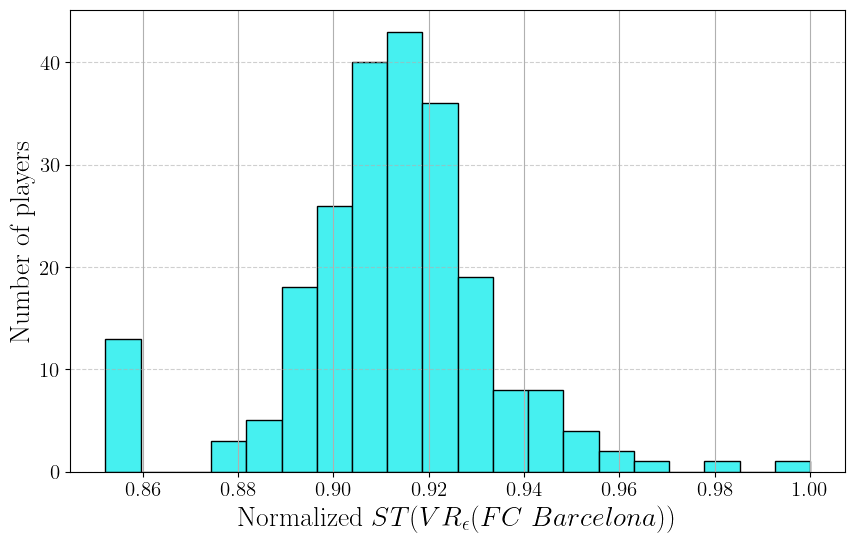

In [9]:
plt.figure(figsize=(10, 6))

plt.hist(normalized_distances, bins=20, color='#46f0f0', edgecolor='black')

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel(r'Normalized $ST(VR_\epsilon(FC \ Barcelona))$', fontsize=20)
plt.ylabel('Number of players', fontsize=20)

plt.grid(True)

plt.show()
